In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
activity = pd.read_csv('FitBit data.csv')

In [4]:
activity.shape

(457, 15)

In [5]:
activity.isnull().sum() # checking the number of missing values in the dataset

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [6]:
activity.head(10) # seeing a sample of 10 rows from the dataset

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850


In [7]:
activity1 = activity.copy() # copying the datset to activity1

In [8]:
activity1['ActivityDate'].unique() # checking out the unique activity dates in the dataset

array(['3/25/2016', '3/26/2016', '3/27/2016', '3/28/2016', '3/29/2016',
       '3/30/2016', '3/31/2016', '4/1/2016', '4/2/2016', '4/3/2016',
       '4/4/2016', '4/5/2016', '4/6/2016', '4/7/2016', '4/8/2016',
       '4/9/2016', '4/10/2016', '4/11/2016', '4/12/2016', '3/12/2016',
       '3/13/2016', '3/14/2016', '3/15/2016', '3/16/2016', '3/17/2016',
       '3/18/2016', '3/19/2016', '3/20/2016', '3/21/2016', '3/22/2016',
       '3/23/2016', '3/24/2016'], dtype=object)

In [9]:
activity1['ActivityDate'].head(10)  # cheking out the datset before transformation

0    3/25/2016
1    3/26/2016
2    3/27/2016
3    3/28/2016
4    3/29/2016
5    3/30/2016
6    3/31/2016
7     4/1/2016
8     4/2/2016
9     4/3/2016
Name: ActivityDate, dtype: object

In [10]:
# adding the yearm month and date columns to the dataset
activity1['year'] = pd.DatetimeIndex(activity1['ActivityDate']).year
activity1['month'] = pd.DatetimeIndex(activity1['ActivityDate']).month
activity1['date'] = pd.DatetimeIndex(activity1['ActivityDate']).day

In [11]:
activity1.head(10) # cheking out the datset after transformation

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3


In [12]:
activity1=activity1.drop(['TrackerDistance'],axis=1)  #dropping the TrackerDistance column

In [13]:
activity1.head(200) # cheking out the first 200 rows of the datset after transformation

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
0,1503960366,3/25/2016,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25
1,1503960366,3/26/2016,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26
2,1503960366,3/27/2016,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27
3,1503960366,3/28/2016,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28
4,1503960366,3/29/2016,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4020332650,4/11/2016,2993,2.15,0.0,0.00,0.00,2.09,0.0,0,0,114,888,2507,2016,4,11
196,4020332650,4/12/2016,8,0.01,0.0,0.00,0.00,0.01,0.0,0,0,1,321,446,2016,4,12
197,4057192912,3/12/2016,0,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1777,2016,3,12
198,4057192912,3/13/2016,0,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1777,2016,3,13


Text(0.5, 1.0, 'Box plot of Calories with Jitter bu day of the month')

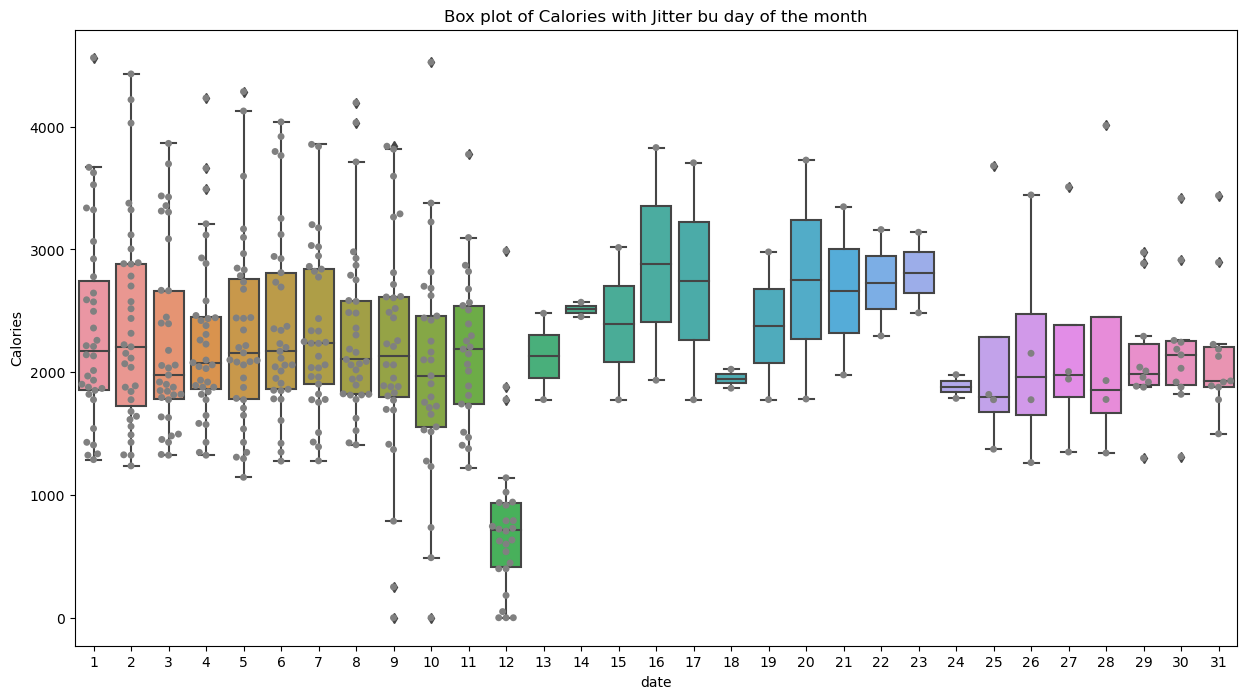

In [14]:
### Groupby the day of the month and make a boxplot of calories burnt
import matplotlib.pyplot as plt
# figure size
plt.figure(figsize=(15,8))

# Usual boxplot
ax = sns.boxplot(x='date', y='Calories', data=activity1)
 
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='date', y='Calories', data=activity1, color="grey")

ax.set_title('Box plot of Calories with Jitter bu day of the month')

In [15]:
# converting the datatype to datetime
activity1['Week'] = pd.to_datetime(activity1.ActivityDate).dt.week
activity1['Year'] = pd.to_datetime(activity1.ActivityDate).dt.year

C:\Users\rahul\AppData\Local\Temp\ipykernel_9068\2972724497.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  activity1['Week'] = pd.to_datetime(activity1.ActivityDate).dt.week


In [16]:
activity1.head()  # cheking out the datset after transformation

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,Week,Year
0,1503960366,3/25/2016,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,12,2016
1,1503960366,3/26/2016,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,12,2016
2,1503960366,3/27/2016,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,12,2016
3,1503960366,3/28/2016,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,13,2016
4,1503960366,3/29/2016,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,13,2016


In [17]:
activity1.ActivityDate.dtype # cheking the datatype of ActivityDate field

dtype('O')

In [18]:
activity1['ActivityDate'] = pd.to_datetime(activity1['ActivityDate']) # converting it to datetime

In [19]:
activity1['day'] = activity1['ActivityDate'].dt.weekday_name # converting the day of the week to the name of the day

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [ ]:
activity1.head(10) # cheking out the datset after transformation

In [ ]:
# figure size
plt.figure(figsize=(15,8))

# simple barplot
ax = sns.barplot(x='day', y='Calories',  data=activity1)

ax.set_title('Barplot of calories by the day of the week')

In [ ]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='SedentaryMinutes', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

In [ ]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='LightlyActiveMinutes', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

In [ ]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt in the moderately active minutes
ax = sns.scatterplot(x='Calories', y='FairlyActiveMinutes', data=activity1)

ax.set_title('Scatterplot of calories vs Fairly Active Minutes')

In [ ]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt in the intensely active minutes
ax = sns.scatterplot(x='Calories', y='VeryActiveMinutes', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

In [ ]:
activity1.head(10) # cheking out the datset before transformation

In [20]:
activity1=activity1.drop(['Week','Year'],axis=1) # dropping the columns week and year

In [21]:
activity1.head(10) # cheking out the datset after transformation

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
0,1503960366,2016-03-25,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25
1,1503960366,2016-03-26,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26
2,1503960366,2016-03-27,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27
3,1503960366,2016-03-28,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28
4,1503960366,2016-03-29,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29
5,1503960366,2016-03-30,10970,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30
6,1503960366,2016-03-31,12256,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31
7,1503960366,2016-04-01,12262,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1
8,1503960366,2016-04-02,11248,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2
9,1503960366,2016-04-03,10016,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3


In [22]:
activity1.shape # cheking the number of rows and columns in the transformed  dataset

(457, 17)

Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on activity minutes')

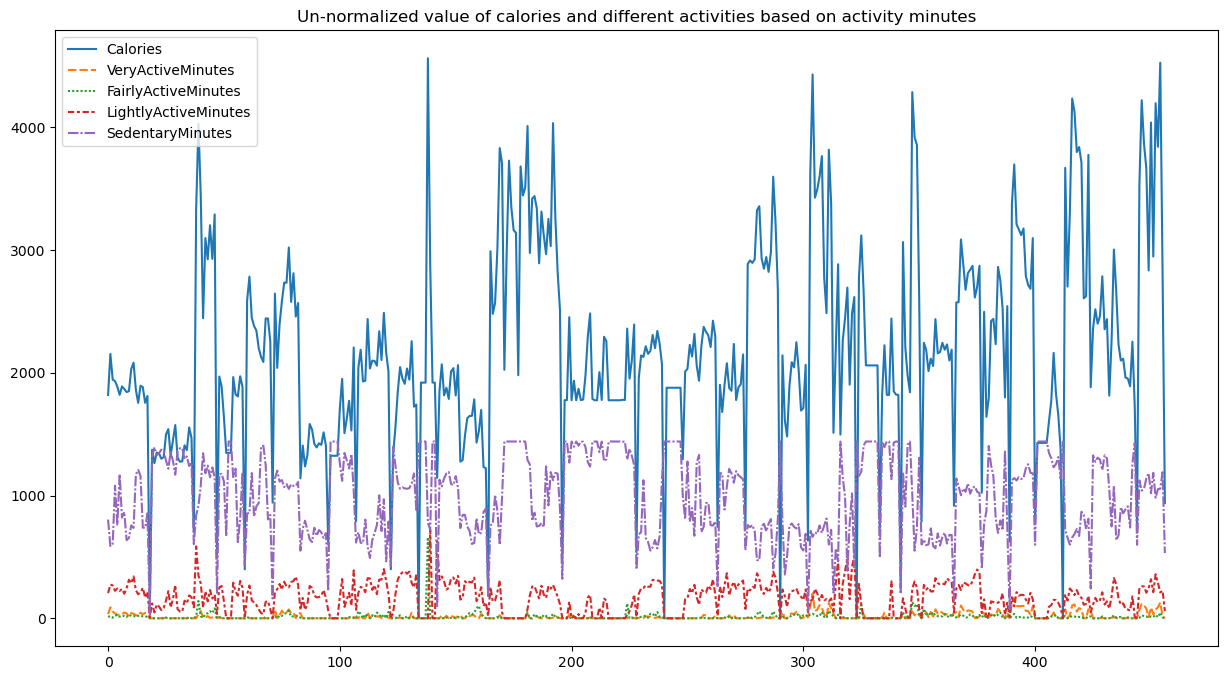

In [23]:
## plot the raw values 

col_select = ['Calories','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
wide_df = activity1[col_select]

# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df)

ax.set_title('Un-normalized value of calories and different activities based on activity minutes')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

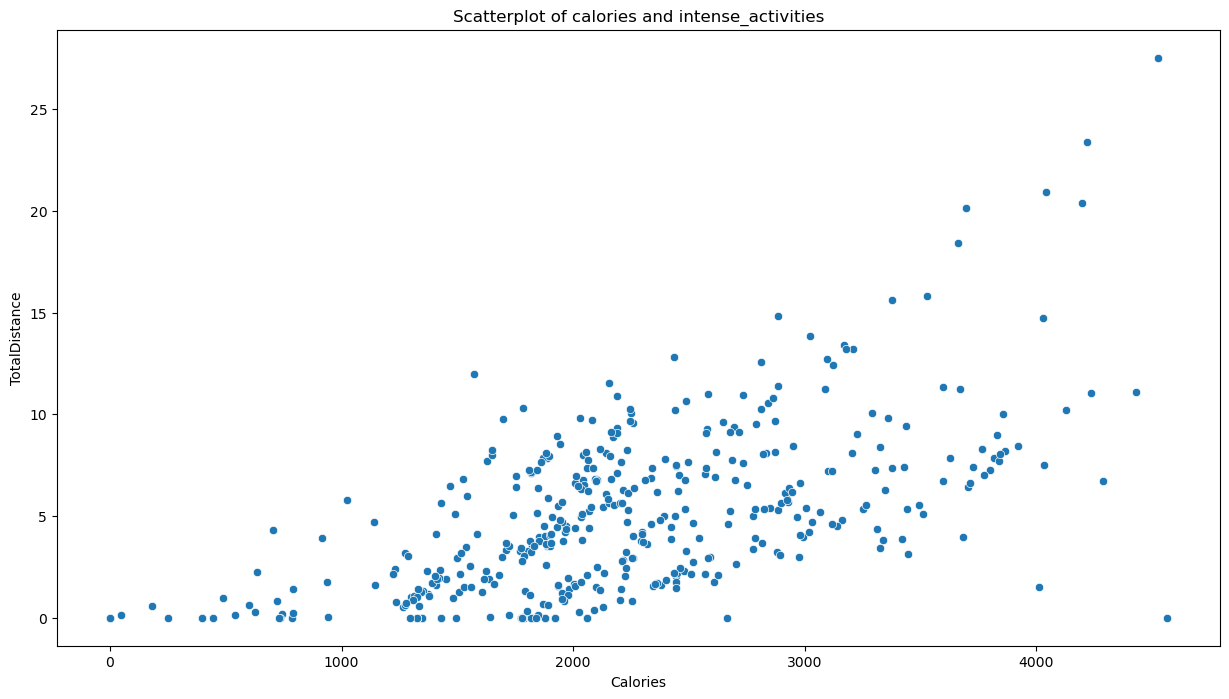

In [24]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between  calories burnt and total distance covered
ax = sns.scatterplot(x='Calories', y='TotalDistance', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

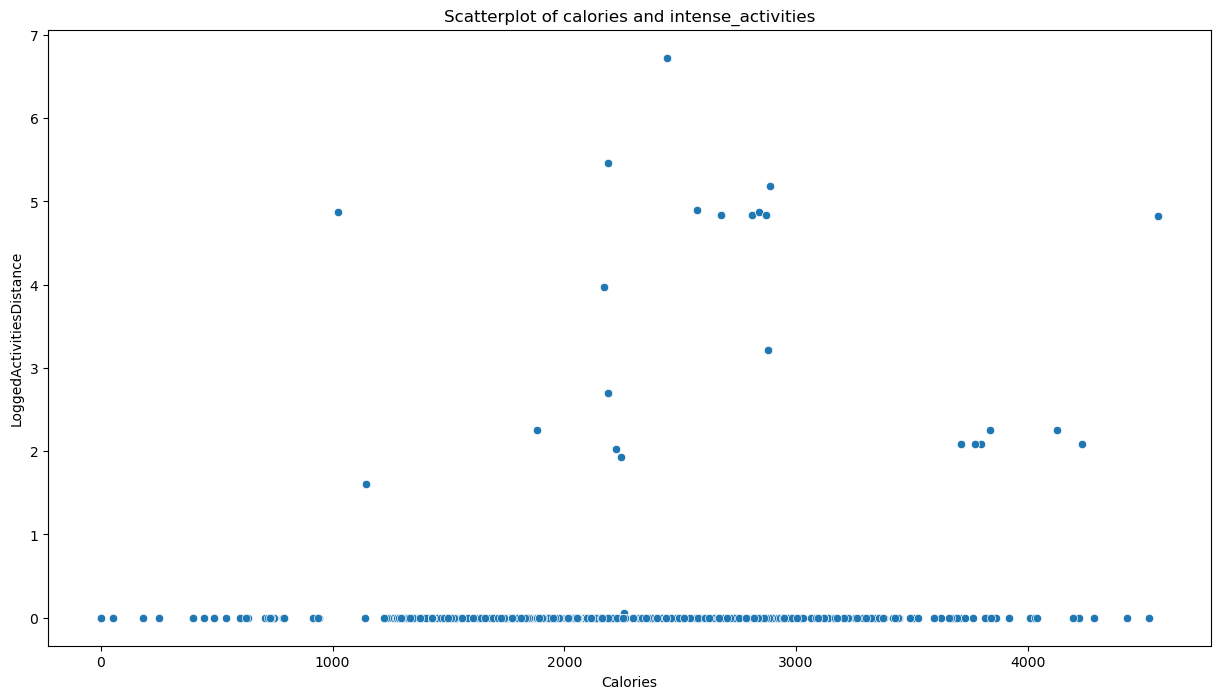

In [25]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt and the loggged activities distance
ax = sns.scatterplot(x='Calories', y='LoggedActivitiesDistance', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

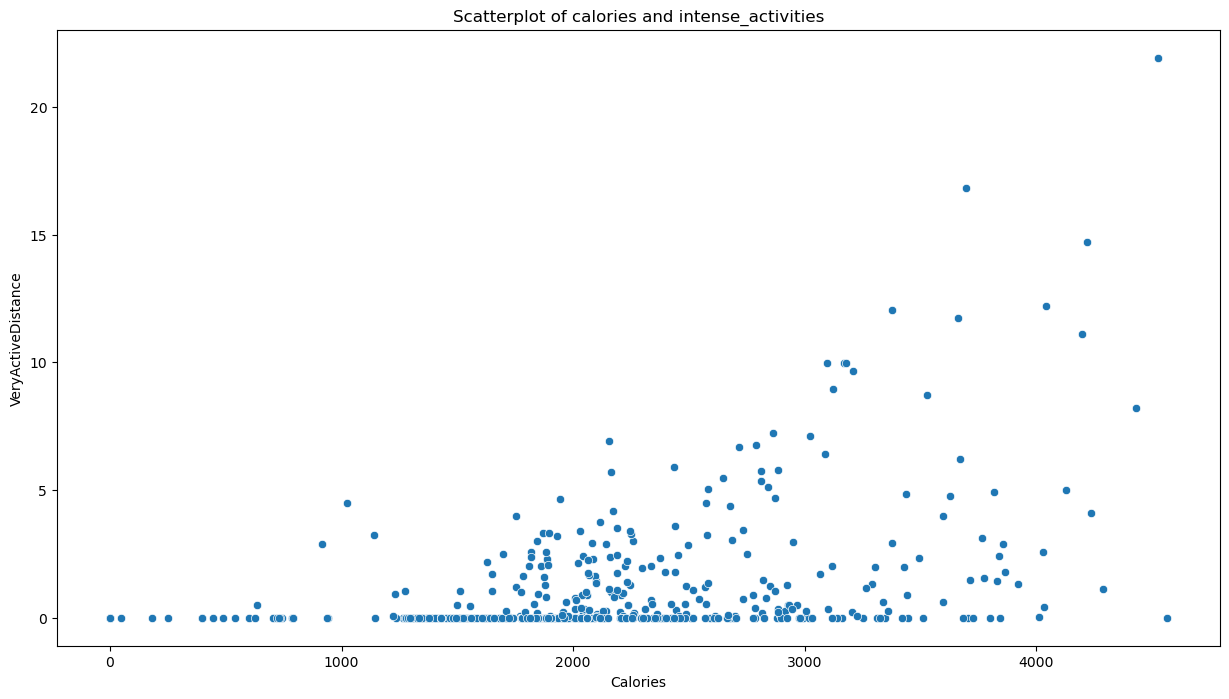

In [26]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt and the distance of intense activies
ax = sns.scatterplot(x='Calories', y='VeryActiveDistance', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

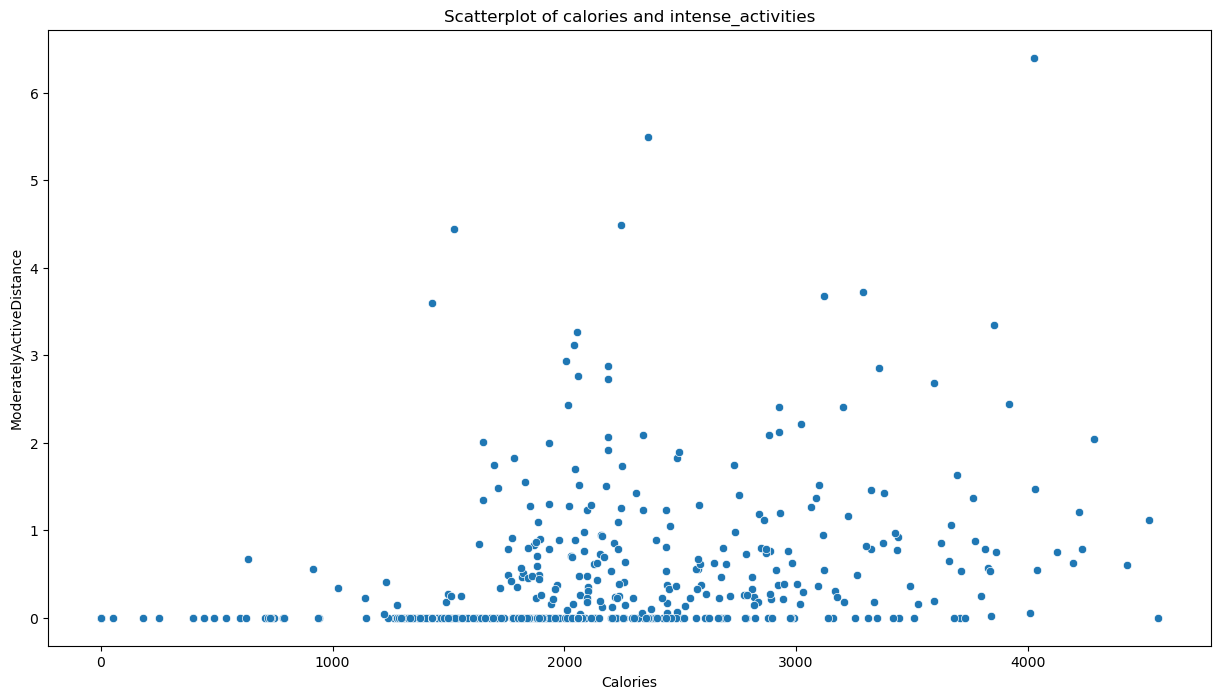

In [27]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt and the distance of moderate activies
ax = sns.scatterplot(x='Calories', y='ModeratelyActiveDistance', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

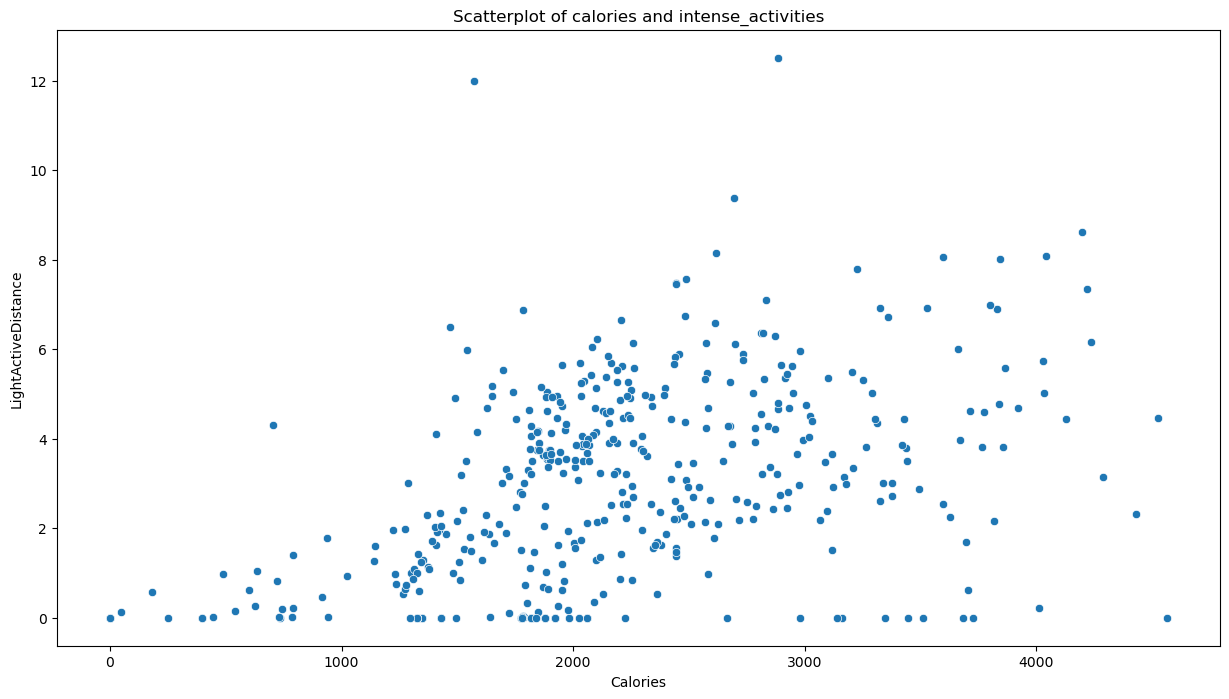

In [28]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='LightActiveDistance', data=activity1)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on distance')

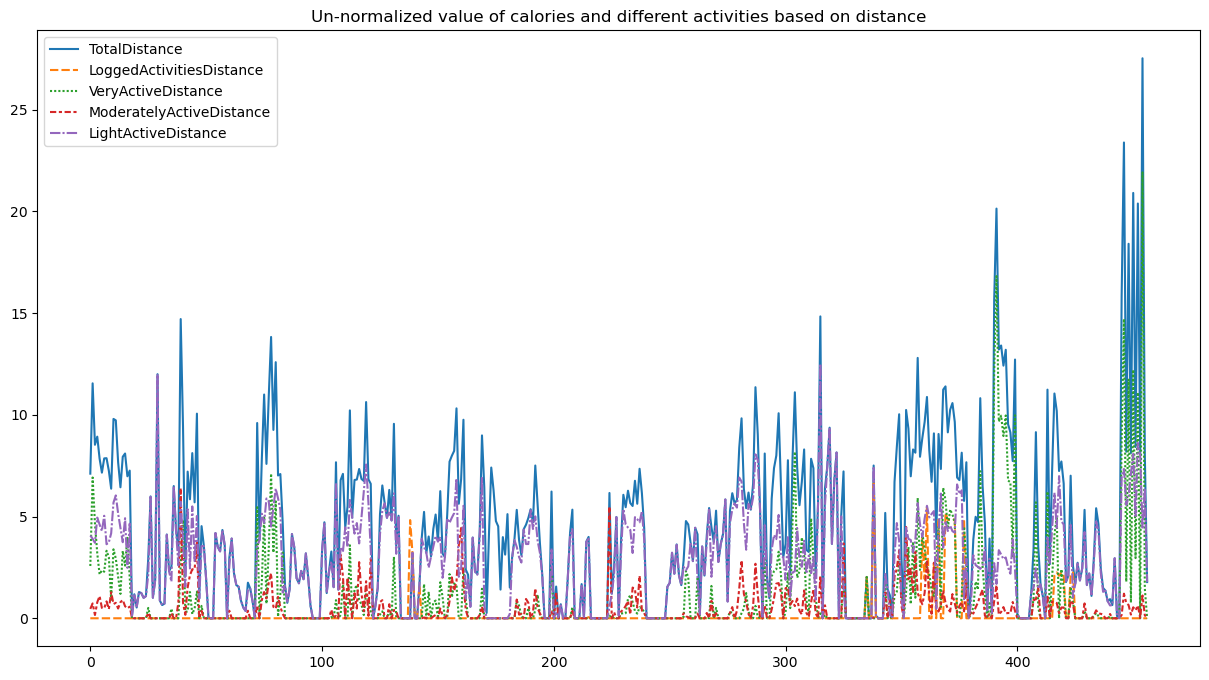

In [29]:
## plot the raw values 

rol_select = ['TotalDistance','LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance', 'LightActiveDistance']
wide_df1 = activity1[rol_select]

# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df1)

ax.set_title('Un-normalized value of calories and different activities based on distance')

The  EDA here gives us the insight about the relation between the active hours, the distance for which the user has moderate and intense activity and the calories burnt during that period. 